In [2]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])
await piplite.install(['skillsnetwork', 'seaborn'])

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [4]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
await download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv','automobileEDA.csv')

In [6]:
#you will need to download the dataset; if you are running locally, please comment out the following 
#await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')


In [7]:
df = pd.read_csv("automobileEDA.csv", header=0)

In [8]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>


In [11]:
X = df[["highway-mpg"]]
Y = df[["price"]]
lm.fit(X,Y)

LinearRegression()

In [12]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [13]:
lm.coef_

array([[-821.73337832]])

In [14]:
lm.intercept_

array([38423.30585816])

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>

<h4>Multiple Linear Regression</h4>


In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [16]:
lm.fit(Z,df["price"])

LinearRegression()

In [17]:
lm.intercept_

-15806.62462632918

In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<h2>2. Model Evaluation Using Visualization</h2>


(0.0, 48173.212766758814)

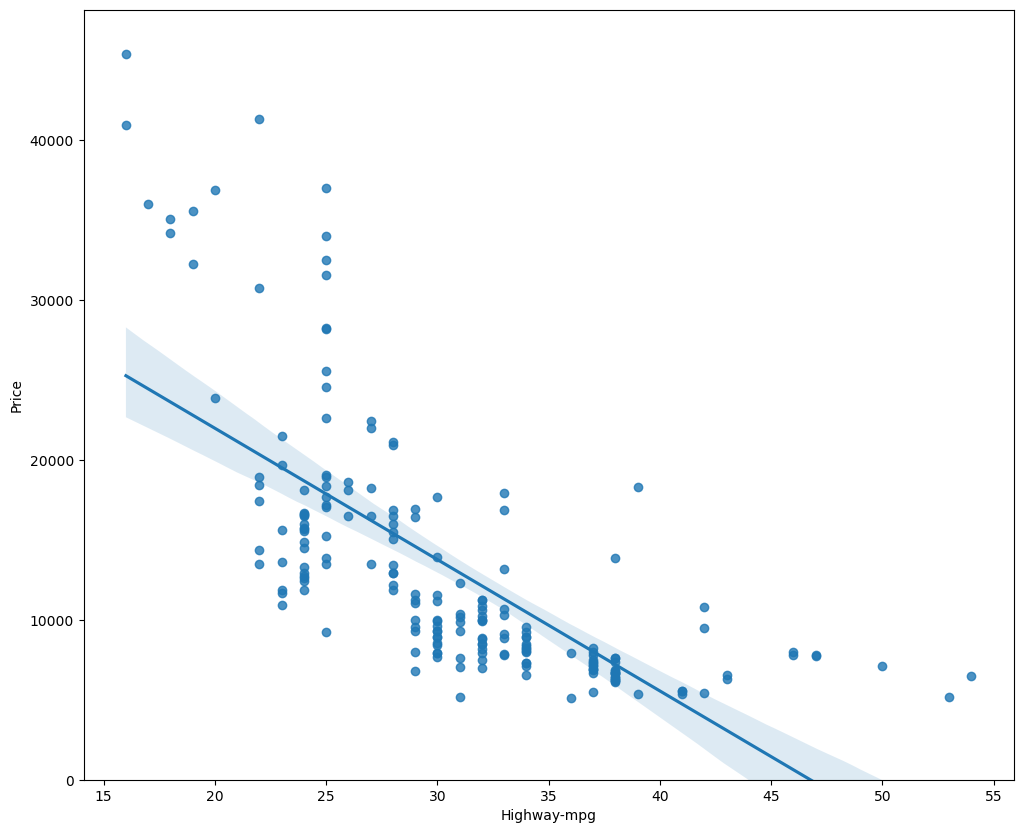

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
height = 10
width = 12
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.xlabel("Highway-mpg")
plt.ylabel("Price")
plt.ylim(0,)

(0.0, 47414.1)

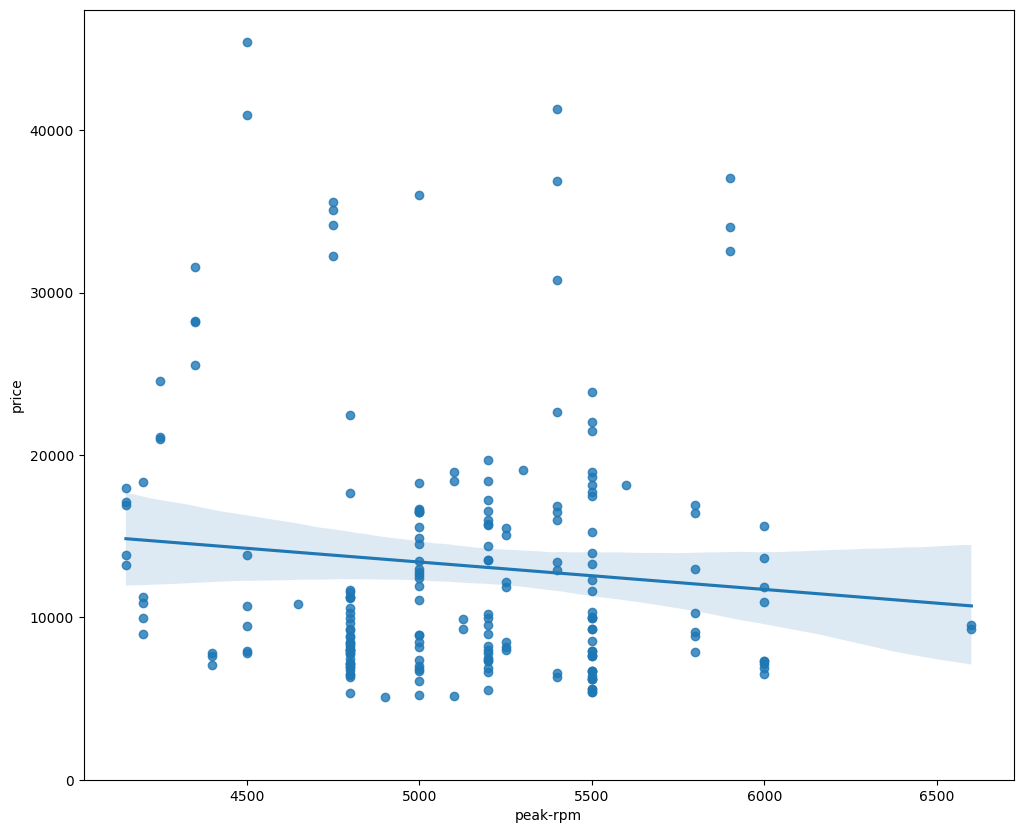

In [20]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [21]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


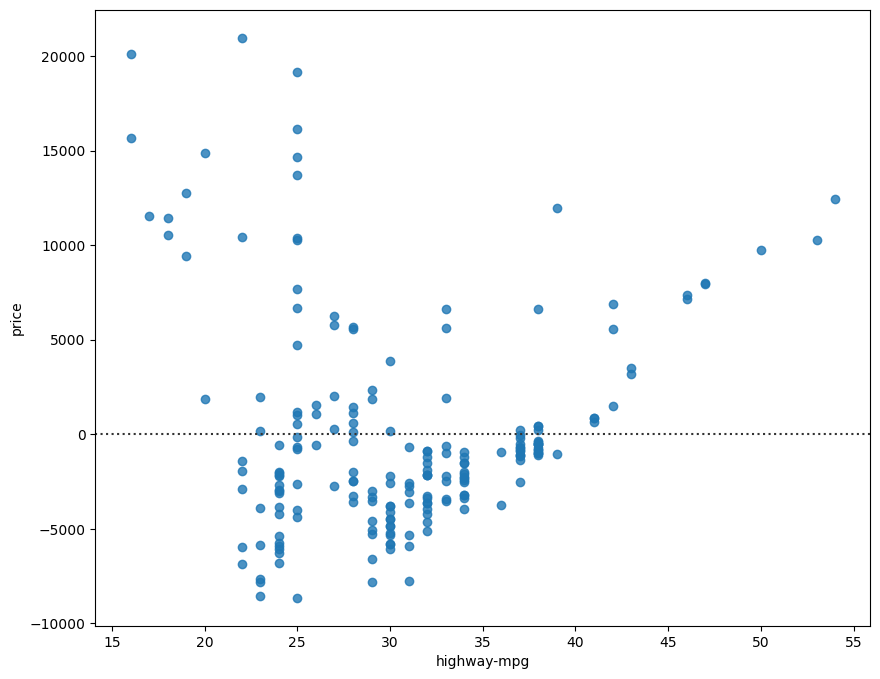

In [22]:
width = 10
height =8
plt.figure(figsize=(width,height))
sns.residplot(x="highway-mpg",y="price",data=df)
plt.show()

<h3>Multiple Linear Regression</h3>


In [23]:
Yhat=lm.predict(Z)

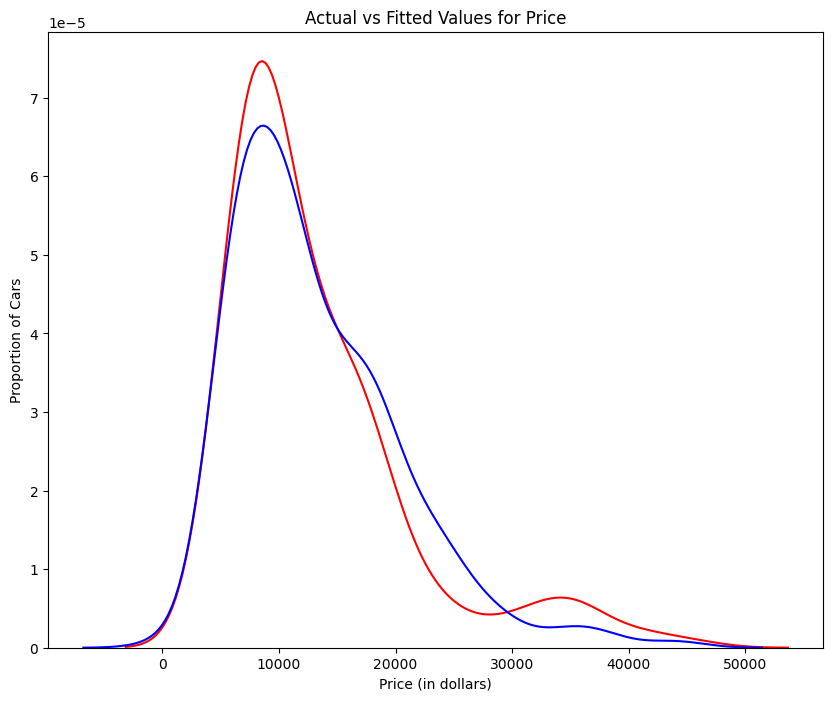

In [25]:
plt.figure(figsize=(width,height))
ax1 = sns.distplot(df["price"],hist=False,color="r",label="Actual Value")
sns.distplot(Yhat,hist=False,color="b",label="Predicted Value",ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>3. Polynomial Regression and Pipelines</h2>


In [26]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [27]:
x = df['highway-mpg']
y = df['price']

In [28]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


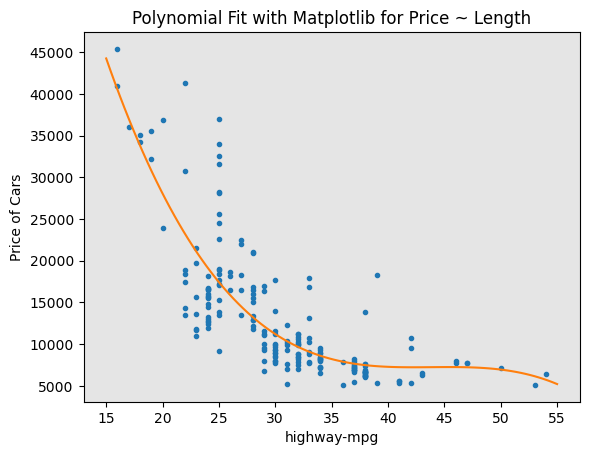

In [29]:
PlotPolly(p, x, y, 'highway-mpg')

<h2>Pipeline</h2>


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [33]:
Input = [('scale',StandardScaler()),('model',LinearRegression()),('polynomial',PolynomialFeatures())]

In [39]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression()),
                ('polynomial', PolynomialFeatures())])

In [37]:
ypipe=pipe.predict(Z)
ypipe[0:4]

<class 'AttributeError'>: 'PolynomialFeatures' object has no attribute 'predict'

<h2>4. Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


In [48]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [41]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


Let's calculate the MSE:


In [47]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df["price"],Yhat)
print("The MSE of SLR is:",mse)

The MSE of SLR is: 31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>


In [49]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577458


In [50]:
Y_predict_multifit = lm.predict(Z)

In [51]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726489


<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [52]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [53]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [54]:
lm.fit(X, Y)
lm

LinearRegression()

In [55]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

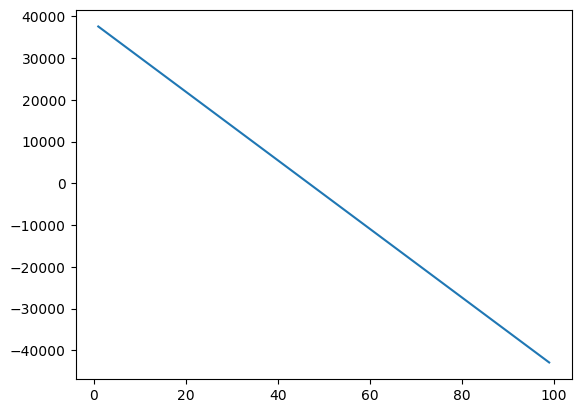

In [58]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
